# Double Slit Data Analysis

The following block of code creates numpy arrays with data measured with the double slit apparatus.  The following shorthand is used for the array names:
[slit][laser/pmt][position/voltage/counts]
slit is s1 for slit 1 only, s2 for slit 2 only, and d for both slits (d=double)
laser/pmt is l for laser-photodiode measurement, p for bulb-pmt (single photon) measurement
position/voltage/counts is p for micrometer position, v for voltage (must go with laser), c for counts (must go with pmt).

So s1lp is the position data for the laser shining through slit 1 (slit 2 is blocked).
And s1lv is the voltage data corresponding to those positions.

Then s2pp and s2pc are the postion data and pmt counts for the bulb data with slit 2 open and slit 1 blocked.

In [7]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

s1lp=np.array([3.9,3.95,4,4.15,4.25,4.35,4.4,4.5,4.6,4.7,4.8,4.9,5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7,7.1,7.2,7.3,7.4,7.5])
s1lv=np.array([0.001,0.001,0.001,0.002,0.003,0.004,0.006,0.009,0.013,0.02,0.028,0.036,0.043,0.052,0.059,0.068,0.074,0.08,0.085,0.088,0.09,0.09,0.088,0.086,0.082,0.076,0.069,0.062,0.053,0.045,0.035,0.026,0.019,0.012,0.008,0.005,0.003,0.001])

s2lp=np.array([4.95,5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8,8.1,8.2])
s2lv=np.array([0.001,0.002,0.003,0.005,0.008,0.014,0.021,0.031,0.042,0.053,0.064,0.077,0.087,0.097,0.106,0.114,0.119,0.123,0.1224,0.125,0.123,0.118,0.112,0.104,0.092,0.077,0.056,0.037,0.023,0.014,0.008,0.004,0.0002,0.001])

dlp=np.array([4,4.1,4.2,4.25,4.3,4.35,4.4,4.45,4.5,4.55,4.6,4.65,4.7,4.75,4.8,4.85,4.95,5,5.05,5.1,5.15,5.2,5.25,5.3,5.35,5.4,5.45,5.5,5.55,5.6,5.65,5.7,5.75,5.8,5.9,5.95,6,6.05,6.1,6.15,6.2,6.25,6.3,6.35,6.4,6.45,6.5,6.55,6.6,6.65,6.7])
dlv=np.array([0,0,0.026,0.092,0.175,0.239,0.316,0.341,0.329,0.279,0.255,0.103,0.019,0.001,0,0,0,0.001,0.039,0.195,0.409,0.628,0.806,0.912,0.994,0.98,0.893,0.73,0.523,0.297,0.095,0.002,0,0,0,0.041,0.245,0.473,0.779,1.025,1.217,1.316,1.32,1.229,1.04,0.801,0.515,0.263,0.045,0.001,0])

s1pp=np.array([5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7,7.1,7.2,7.3,7.4,7.5])
s1pc=np.array([923,873,913,956,976,932,999,963,972,980,892,983,883,856,923,893,984,789,803,845,913,764,699,698,693,650])

s2pp=np.array([5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7,7.1,7.2,7.3,7.4,7.5,7.6,7.7,7.8,7.9,8])
s2pc=np.array([723,695,803,793,813,1030,906,1023,963,1075,1093,1205,1176,1208,1240,1285,1208,1275,1260,1230,1234,1286,1230,1246,1203,1130,1093,1056,1003,945,999])

dpp=np.array([5,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9,6,6.1,6.2,6.3,6.4,6.5,6.6,6.7,6.8,6.9,7,7.1,7.2,7.3,7.4,7.5,7.6])
dpc=np.array([793,573,624,1124,1683,2130,2240,1542,905,640,853,1684,2450,2960,2780,1702,893,694,1002,1630,2125,2560,1953,1506,773,660,970])



## Fitting the laser diffraction data

Start by fitting the single slit diffraction data for the central location, slit width, and nominal intensity.  The parameters are found by minimizing the difference squared between the measured and predicted intensity as a function of position.  First define a function for the predicted diffraction intensity, here called laser_diffraction.  The function takes the array of position data, x, and optimizes the parameters for the slit width a, the nominal intensity I0, the center of the diffraction peak x0, and a potential threshold th.  The calculation also needs the slit-to-detector distance L and the laser wavelength lam, both treated as constants.

The optimization of the fit is performed by the curve_fit function of the scipy.optimize module.  The curve_fit function takes the function to be fit, the arrays of x and y data, and other optional arguments (see the documentation for more details).  We supply the p0 optional argument that sets the starting values for the parameters that are optimized.  The curve_fit function returns an array of the optimized parameter values and a 2D array with the covariance matrix of the parameters at the optimized point.

We then plot the given data in blue and the optimized in red.  Below the fit plot is a plot of the residuals (data - fit).  The residual plot is useful to check that there is nothing odd in the fit.  Sometimes residuals are shown as the data-fit difference, like here, the data-fit difference divided by the measurement uncertainty, or the data/fit ratio.  From this residual plot, one can estimate that the measurements have an uncertainty of about 0.001V = 1mV.  This should be compared to the presumed accuracy of the voltmeter.  (That comparison cannot be made at this time.)

Below the residual we print a list of the optimized values and their uncertainties.  The uncertainties are the square roots of the diagonal elements of the covariance matrix.

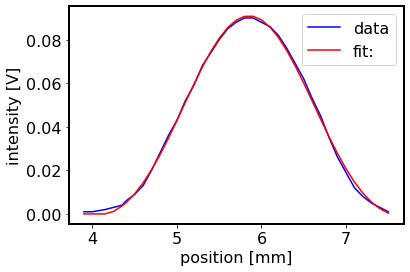

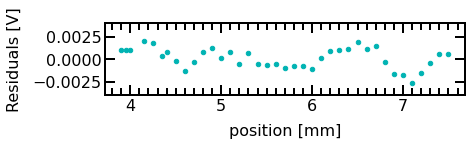

Best fit results:
a = 0.179 +/- 0.002
I0 = 0.369 +/- 0.003
x0 = 5.853 +/- 0.003
th = 0.001 +/- 0.001


In [15]:
import math as m
from scipy.optimize import curve_fit

# d needs to be in the same units as the position, 50cm = 500mm in this case.
L=500
# for the laser data fit, use a fixed wavelength of 670nm, again in mm
lam=0.000670

# The function calculates the diffracted laser intensity at each position in the array x.
# Note that if one of the positions is sufficiently close to x0, then there will be a 
#   divide by zero error in because we can have alpha=0.  Need to find a good way to avoid
#   this, perhaps by requirig that alpha is zero it is replaced by a small nonzero value.
def laser_diffraction(x,a,I0,x0,th):
    alpha = (m.pi*a/lam)*np.sin((x-x0)/L)
    return np.clip((I0/4)*(np.sin(alpha)/alpha)**2-th, 0.0, np.inf)

s1lpar,s1lcov = curve_fit(laser_diffraction, s1lp, s1lv, p0=[0.15,0.3,5.81,0.03])

s1lres = s1lv - laser_diffraction(s1lp, *s1lpar)

plt.rcParams['font.size'] = 16
plt.rcParams['axes.linewidth'] = 2

plt.plot(s1lp,s1lv,'b-', label='data')
plt.plot(s1lp,laser_diffraction(s1lp,*s1lpar), 'r-',
        label='fit:')
plt.xlabel('position [mm]')
plt.ylabel('intensity [V]')
plt.legend()
plt.show()

# Create figure object and store it in a variable called 'fig'
fig = plt.figure(figsize=(5, 1))

# Add axes object to our figure that takes up entire figure
ax = fig.add_axes([0, 0, 1, 1])

# Edit the major and minor ticks of the x and y axes
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

# Edit the major and minor tick locations of x and y axes
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(1))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.0025))

# Plot the noisy exponential data
ax.scatter(s1lp, s1lres, s=20, color='#00b3b3', label='Data')

# Add the x and y-axis labels
ax.set_xlabel('position [mm]', labelpad=10)
ax.set_ylabel('Residuals [V]', labelpad=10)

# Set the axis limits
#ax.set_xlim(0, 1000)
ax.set_ylim(-0.004, 0.004)

#plt.savefig('dummy_dataset_powerlaw_residuals.png', dpi=100, bbox_inches='tight')
plt.show()


print('Best fit results:')
print('a = %.3f +/- %.3f' % (s1lpar[0], m.sqrt(s1lcov[0,0])))
print('I0 = %.3f +/- %.3f' % (s1lpar[1], m.sqrt(s1lcov[1,1])))
print('x0 = %.3f +/- %.3f' % (s1lpar[2], m.sqrt(s1lcov[2,2])))
print('th = %.3f +/- %.3f' % (s1lpar[3], m.sqrt(s1lcov[3,3])))

